# AGENDA

1. Definir conceptos
2. Cargar datos desde Drive
3. Cálculo de la desviación estándar
4. Exploración de distribución de datos (gráficos)

## 1. Definición de conceptos

### 1.1 Varianza

Medida de dispersión que promedia las diferencias cuadradas de cada dato respecto a la media. Cuanto mayor la varianza, más dispersos están los datos; sus unidades quedan al cuadrado

### 1.2 Desviación estándar

Raíz cuadrada de la varianza. Expresa la dispersión en las mismas unidades de la variable, por eso es más interpretable: mayor desviación estándar ⇒ datos más esparcidos

### 1.3 Desviación de la media absoluta

Promedio de las distancias absolutas respecto a la media. Resume la dispersión sin elevar al cuadrado; es algo menos sensible a outliers que la varianza, pero aún les responde

### 1.4 Desviación absoluta mediana de la mediana (MAD)

Mediana de las distancias absolutas a la mediana. Es una medida robusta a valores atípicos; a veces se multiplica por 1.4826 para aproximar la desviación estándar si hay normalidad

### 1.5 Rango

Diferencia entre el máximo y el mínimo. Es la medida de dispersión más simple, pero depende mucho de valores extremos

### 1.6 Estadística ordinal

Datos en categorías ordenadas, donde el orden importa pero las distancias entre categorías no son comparables. Se usan mediana, rangos y percentiles más que medias

### 1.7 Percentil

Valor que deja por debajo un porcentaje 𝑝% de los datos

### 1.8 R

Diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Mide la dispersión del 50% central de los datos y es robusto frente a outliers

In [94]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
from statsmodels import robust
from statsmodels.robust.scale import mad

In [108]:
data = pd.read_csv("/content/drive/MyDrive/state.csv")
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [109]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [110]:
Mayor_poblacion=data.groupby(["Population"])["State"].max()
Mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [111]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [112]:
# Calculando la desviación estándar y los cuantiles
data["Population"].std()

6848235.347401142

In [101]:
# Extraer la desviación estándar de la tasa de asesinatos

std_murder = data["Murder.Rate"].std(ddof=1)
std_murder

1.915736124302923

In [102]:
# Calcular el IQR
data.Population.quantile(0.75)-data.Population.quantile(0.25)

np.float64(4847308.0)

In [103]:
# Calcular IQR de la tasa de asesinatos

q1 = data["Murder.Rate"].quantile(0.25)
q3 = data["Murder.Rate"].quantile(0.75)
iqr_murder = q3 - q1
iqr_murder

np.float64(3.125)

In [104]:
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [105]:
# Calcular el MAD de la tasa de asesinatos

mad_murder = mad(data["Murder.Rate"].dropna(), c=1.0)
mad_murder

np.float64(1.5999999999999996)

In [91]:
## HINT - Trabajo con dataframes

data1 = {"Nombre": ["Camilo", "Kevin", "Santiago"],
         "Edades": ["10", "15", "3"],
         "Juegos": ["Basketball", "Tenis de mesa", "Futbol"]
        }

df = pd.DataFrame(data1)
df

,Nombre,Edades,Juegos
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [90]:
# Renonbrar headers
df = df.rename(columns={"Edades":"Años","Juegos":"Deportes"})
df

,Nombre,Años,Deportes
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [106]:
# Reemplaza headers de inglés a español
# SI SE REEMPLAZA YA, EL RESTO DEL CUADERNO DE COLAB DARÁ ERROR PORQUE SE CAMBIARON LOS NOMBRES

renomb = {
    "State": "Estado",
    "Population": "Poblacion",
    "Murder.Rate": "Tasa_Asesinatos",
    "Total": "Total",
}
data = data.rename(columns={k: v for k, v in renomb.items() if k in data.columns})
data.head()

,Estado,Poblacion,Tasa_Asesinatos,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


## 4. EXPLORACIÓN EN LA DISTRIBUCIÓN DE DATOS
### 4.1 Diagrama de caja

Grafico que resume una distribución con el mínimo, Q1, mediana, Q3 y maximo. La caja va de Q1 a Q3, la linea marca la mediana, los bigotes muestran el rango típico y los puntos fuera para comparar grupos

### 4.2 Diagrama de frecuencias

Barras qque muestran cuantas veces aparece cada categoría o clase para variables cualitativas o discretas, y ver rapidamente que valores son mas comunes

### 4.3 Histograma

Barras adyacentes que agrupan datos numrericos en intervalos. La altura es la frecuencia en cada intervalo y muestra la forma de la distribucion

### 4.4 Diagrama de densidad

Curva que aproxima la distribución de una variable continua, y permite ver forma y picos sin depender de los cortes de un histograma

### 4.1 Diagrama de caja


In [113]:
data["Murder.Rate"].quantile([0.05,0.25,0.5,0.75,0.95])


,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


<Axes: label='Población en millones'>

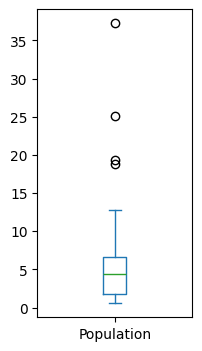

In [114]:
# Gráfica de diragrama de caja
ax = (data.Population/1_000_000).plot.box(figsize=(2,4))
ax.set_label("Población en millones")
ax

In [115]:
# Calculando la tabla de frecuencia e histograma
binnedPopulation = pd.cut(data["Population"], 10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


<Axes: label='Poblacion en millones', ylabel='Frequency'>

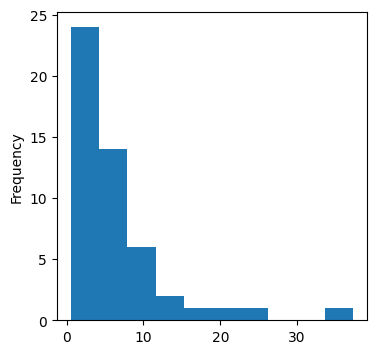

In [116]:
ax = (data.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Poblacion en millones")
ax

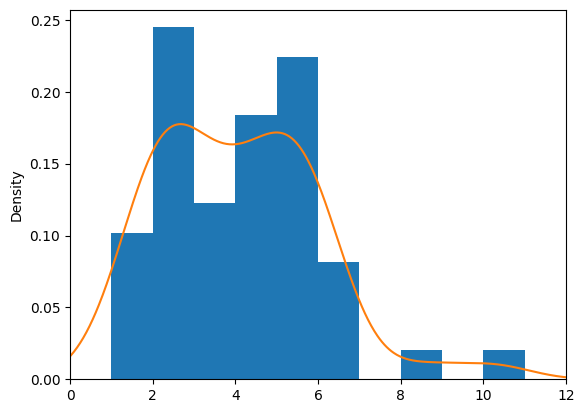

In [117]:
# Diagrama de dispersion y al curva de densidad
ax = data["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data["Murder.Rate"].plot.density(ax=ax)
ax.set_label("Tasa de asesinatos por 1000000 de habitantes")

#  ACTIVIDAD

## TRABAJAR CON EL DATASET DE LA TAREA DE LA CLASE PASADA

## 0. Instalación de paquetes


In [118]:
!pip -q install statsmodels



## 1. Imports y carga del dataset


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from statsmodels.robust.scale import mad
    HAS_SM = True
except Exception:
    HAS_SM = False

# Cargamos el MISMO dataset usado en la actividad de Seaborn en Clase 2
data = sns.load_dataset('tips').copy()
print("Dataset cargado:", "tips", "| shape:", data.shape)
data.head()


Dataset cargado: tips | shape: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Reivision de los datos


In [120]:
# Mostrar columnas o features
list(data.columns)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [121]:
# Información general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [122]:
# Estadísticos descriptivos básicos
try:
    desc = data.describe(include='all', datetime_is_numeric=True)  # pandas ≥ 1.1
except TypeError:
    # Fallback para pandas más antiguo (sin datetime_is_numeric)
    desc = data.describe(include='all')

In [ ]:
# Conteo de valores faltantes
na_counts = data.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(data) * 100).round(2)
pd.DataFrame({"faltantes": na_counts, "%": na_pct})

## 3. Medidas de tendencia central y variabilidad

In [123]:
col = "total_bill"
serie = data[col].dropna()
# Media, mediana y moda
media = serie.mean()
mediana = serie.median()
moda = serie.mode().iloc[0] if not serie.mode().empty else np.nan
media, mediana, moda

(np.float64(19.78594262295082), 17.795, np.float64(13.42))

In [124]:
# Desviación estándar
std_val = serie.std(ddof=1)  # muestral
std_val

8.902411954856856

In [125]:
# IQR
q1 = serie.quantile(0.25)
q3 = serie.quantile(0.75)
iqr_val = q3 - q1
q1, q3, iqr_val

(np.float64(13.3475),
 np.float64(24.127499999999998),
 np.float64(10.779999999999998))

In [126]:
# MAD (Median Absolute Deviation)
if HAS_SM:
    mad_val = float(mad(serie, c=1.0))  # c=1.0: MAD "crudo"
else:
    med = np.median(serie)
    mad_val = float(np.median(np.abs(serie - med)))
mad_val

5.03

## 4. Exploración de la distribución de datos
### 4.1 Gráfica de diagrama de caja

<Axes: label='total_bill'>

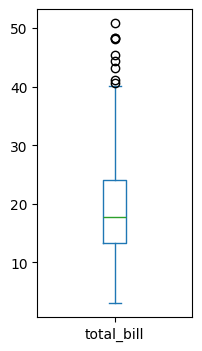

In [127]:
# Gráfica de diagrama de caja (boxplot) para la columna elegida
ax = data[col].plot.box(figsize=(2,4))
ax.set_label(col)
ax

### 4.2 Tabla de frecuencia e histograma


In [128]:
# Se calcula la tabla de frecuencia e histograma
binned = pd.cut(data[col], 10)
tabla_frec = binned.value_counts().sort_index()
tabla_frec

,count
total_bill,
"(3.022, 7.844]",7
"(7.844, 12.618]",42
"(12.618, 17.392]",68
"(17.392, 22.166]",51
"(22.166, 26.94]",31
"(26.94, 31.714]",19
"(31.714, 36.488]",12
"(36.488, 41.262]",7
"(41.262, 46.036]",3


<Axes: xlabel='total_bill', ylabel='Frecuencia'>

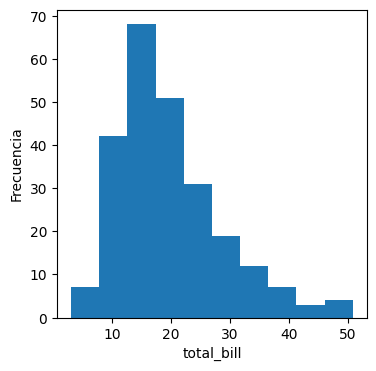

In [129]:
# Histograma simple
ax = data[col].plot.hist(figsize=(4,4), bins=10)
ax.set_xlabel(col)
ax.set_ylabel("Frecuencia")
ax

### 4.3 Dispersión y curva de densidad

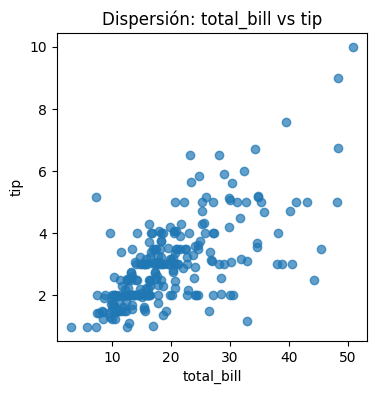

In [130]:
# Diagrama de dispersióon
x_col, y_col = "total_bill", "tip"
if x_col in data.columns and y_col in data.columns:
    plt.figure(figsize=(4,4))
    plt.scatter(data[x_col], data[y_col], alpha=0.7)
    plt.title(f"Dispersión: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
else:
    print("Columnas para dispersión no disponibles")

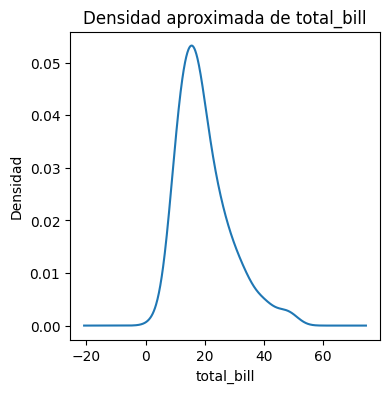

In [131]:
# Curva de densidad
plt.figure(figsize=(4,4))
try:
    data[col].plot.kde()
except Exception:
    plt.hist(data[col].dropna(), bins=20, density=True)
plt.title(f"Densidad aproximada de {col}")
plt.xlabel(col)
plt.ylabel("Densidad")
plt.show()

## 5. Trabajo con DataFrames — renombrar headers (inglés → español)


In [132]:
renomb = {
    "total_bill": "Cuenta_Total",
    "tip": "Propina",
    "sex": "Sexo",
    "smoker": "Fumador",
    "day": "Dia",
    "time": "Momento",
    "size": "Tamano",
}
data_es = data.rename(columns=renomb)
list(data_es.columns)

['Cuenta_Total', 'Propina', 'Sexo', 'Fumador', 'Dia', 'Momento', 'Tamano']

In [133]:
data_es.head()

,Cuenta_Total,Propina,Sexo,Fumador,Dia,Momento,Tamano
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
